## Exploratory Data Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn

import dask_ml.model_selection as ms
import dask_ml.preprocessing as pr
from dask.distributed import Client
import dask.dataframe as dd

import dask_ml.model_selection as ms
import dask_ml.preprocessing as pr
import dask.dataframe as dd

from sklearn.ensemble import RandomForestClassifier
from joblib import parallel_backend





In [2]:
file_path = "block_final.csv"

data = pd.read_csv(file_path)

In [3]:
data.head()

,observation_intensity,block,longit,latit,obsdate,date,dayofyear,dayofweek,temperature_avg,precipitation_avg,...,area_landuse_hoofdweg,area_landuse_natnatuurlijkterrein,area_landuse_recreatie,area_landuse_semibebouwd,area_landuse_water,pop225,roadlength_sum,label,holiday,wet_natural_site
0,4,171,18,379,1/1/2017,20170101,1,7,1.49295,5.98199,...,19376.667810,0.0000,1004.67382,18015.933320,38737.11937,7095,2282.010518,-1,1,0
1,4,209,19,379,1/1/2017,20170101,1,7,1.49449,5.96098,...,8570.433755,172633.3435,50655.65411,5041.642897,0.00000,7435,1323.667141,-1,1,0
2,1,234,20,365,1/1/2017,20170101,1,7,1.27349,5.04328,...,35939.905100,0.0000,0.00000,0.000000,18751.22125,9635,3464.809128,-1,1,0
3,1,248,20,379,1/1/2017,20170101,1,7,1.49585,5.93493,...,33531.789560,0.0000,469879.34270,2835.239442,0.00000,13210,6011.812963,-1,1,0
4,6,280,21,371,1/1/2017,20170101,1,7,1.37332,5.76400,...,93898.761540,0.0000,0.00000,15.118859,0.00000,13930,4938.346711,0,1,0


In [4]:
data.columns

Index(['observation_intensity', 'block', 'longit', 'latit', 'obsdate', 'date',
       'dayofyear', 'dayofweek', 'temperature_avg', 'precipitation_avg',
       'area_landuse_bedrijfsterrein', 'area_landuse_coastalwater',
       'area_landuse_droognatuurlijkterrein', 'area_landuse_glastuinbouw',
       'area_landuse_hoofdweg', 'area_landuse_natnatuurlijkterrein',
       'area_landuse_recreatie', 'area_landuse_semibebouwd',
       'area_landuse_water', 'pop225', 'roadlength_sum', 'label', 'holiday',
       'wet_natural_site'],
      dtype='object')

### Random statistics

In [5]:
data.describe()

,observation_intensity,block,longit,latit,date,dayofyear,dayofweek,temperature_avg,precipitation_avg,area_landuse_bedrijfsterrein,...,area_landuse_hoofdweg,area_landuse_natnatuurlijkterrein,area_landuse_recreatie,area_landuse_semibebouwd,area_landuse_water,pop225,roadlength_sum,label,holiday,wet_natural_site
count,535042.000000,535042.000000,535042.000000,535042.000000,5.350420e+05,535042.000000,535042.000000,535042.000000,535042.000000,535042.000000,...,535042.000000,535042.000000,535042.000000,535042.000000,535042.000000,535042.000000,535042.000000,535042.000000,535042.000000,535042.000000
mean,4.700607,20367.890108,153.119564,468.666806,2.017036e+07,89.174513,4.249780,13.333826,1.516809,27060.067815,...,34972.213383,33905.219051,46383.509021,22422.421568,87494.813054,150967.287736,5593.726666,-0.636344,0.347849,0.007912
std,10.555484,12718.700367,57.462206,64.915760,1.625233e+02,49.511377,2.038241,7.110803,3.266683,80587.806905,...,36575.975523,101271.705985,89650.818749,58246.571573,165363.478724,161135.091519,5733.632126,0.678111,0.476288,0.088594
min,1.000000,60.000000,15.000000,308.000000,2.017010e+07,1.000000,1.000000,-3.344500,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,1.000000,9444.000000,111.000000,423.000000,2.017022e+07,48.000000,2.000000,8.645120,0.000000,0.000000,...,12458.099370,0.000000,0.000000,0.000000,0.000000,42245.000000,1752.548553,-1.000000,0.000000,0.000000
50%,2.000000,18135.000000,150.000000,458.000000,2.017040e+07,91.000000,4.000000,12.548950,0.000000,0.000000,...,25704.977055,0.000000,0.000000,0.000000,20497.907240,97790.000000,3267.206507,-1.000000,0.000000,0.000000
75%,4.000000,31226.000000,197.000000,510.000000,2.017051e+07,129.000000,6.000000,18.570100,1.457168,9992.516227,...,44485.893030,8366.820799,54227.062770,16078.330160,82819.223050,206950.000000,7444.872666,-1.000000,1.000000,0.000000
max,2971.000000,44607.000000,277.000000,619.000000,2.017063e+07,181.000000,7.000000,34.993700,53.430100,979625.972100,...,441559.824500,989632.586800,864883.977500,886465.821600,1000000.000000,941120.000000,33998.706770,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'observation_intensity'}>,
        <AxesSubplot:title={'center':'precipitation_avg'}>],
       [<AxesSubplot:title={'center':'temperature_avg'}>,
        <AxesSubplot:title={'center':'pop225'}>],
       [<AxesSubplot:title={'center':'roadlength_sum'}>, <AxesSubplot:>]],
      dtype=object)

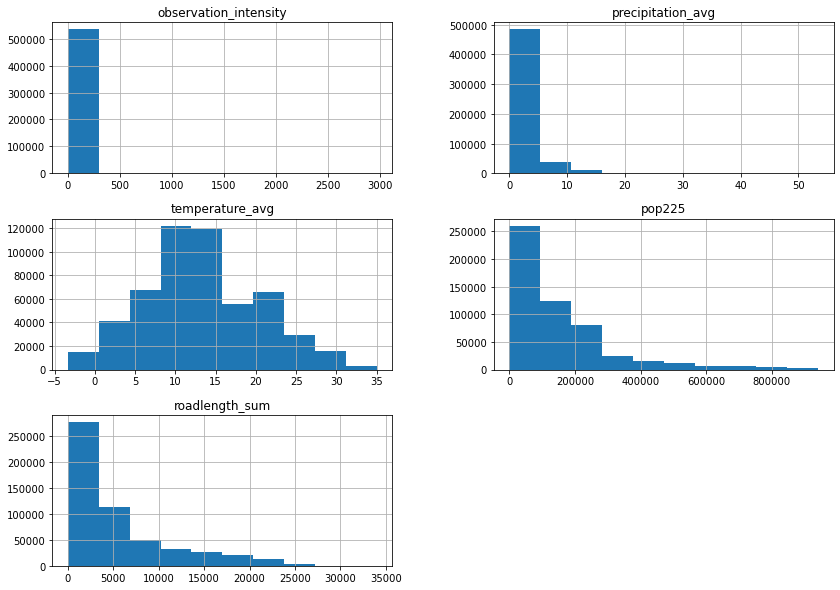

In [6]:
data.hist(column=['observation_intensity','precipitation_avg', 'temperature_avg', 'pop225', 'roadlength_sum'],bins=10, figsize=(14, 10))

In [7]:
data_1=data [['observation_intensity','precipitation_avg', 'temperature_avg', 'pop225', 'roadlength_sum']]

In [8]:
data_1.describe()

,observation_intensity,precipitation_avg,temperature_avg,pop225,roadlength_sum
count,535042.000000,535042.000000,535042.000000,535042.000000,535042.000000
mean,4.700607,1.516809,13.333826,150967.287736,5593.726666
std,10.555484,3.266683,7.110803,161135.091519,5733.632126
min,1.000000,0.000000,-3.344500,0.000000,0.000000
25%,1.000000,0.000000,8.645120,42245.000000,1752.548553
50%,2.000000,0.000000,12.548950,97790.000000,3267.206507
75%,4.000000,1.457168,18.570100,206950.000000,7444.872666
max,2971.000000,53.430100,34.993700,941120.000000,33998.706770


### Normalise Data

In [9]:
data_norm = pd.DataFrame()
for (colname, coldata) in data.iteritems(): # go through columns of dataframe
    if colname == 'obsdate' \
    or colname == 'block' \
    or colname == 'observation_intensity' \
    or colname == 'mdate' \
    or colname == 'holiday' \
    or colname == 'longit' \
    or colname == 'latit' \
    or colname == 'label' \
    or colname == 'wet_natural_site' \
    or colname == 'dayofweek':
        data_norm[colname] = data[colname]
    else:
        data_norm[colname] = (data[colname] - data[colname].mean()) / (data[colname].max() - data[colname].min())
        

In [10]:
data_norm.head()

,observation_intensity,block,longit,latit,obsdate,date,dayofyear,dayofweek,temperature_avg,precipitation_avg,...,area_landuse_hoofdweg,area_landuse_natnatuurlijkterrein,area_landuse_recreatie,area_landuse_semibebouwd,area_landuse_water,pop225,roadlength_sum,label,holiday,wet_natural_site
0,4,171,18,379,1/1/2017,-0.492017,-0.489858,7,-0.308853,0.083571,...,-0.035319,-0.034260,-0.052468,-0.004971,-0.048758,-0.152873,-0.097407,-1,1,0
1,4,209,19,379,1/1/2017,-0.492017,-0.489858,7,-0.308813,0.083177,...,-0.059792,0.140181,0.004940,-0.019607,-0.087495,-0.152512,-0.125595,-1,1,0
2,1,234,20,365,1/1/2017,-0.492017,-0.489858,7,-0.314578,0.066002,...,0.002192,-0.034260,-0.053630,-0.025294,-0.068744,-0.150175,-0.062618,-1,1,0
3,1,248,20,379,1/1/2017,-0.492017,-0.489858,7,-0.308778,0.082690,...,-0.003262,-0.034260,0.489656,-0.022096,-0.087495,-0.146376,0.012297,-1,1,0
4,6,280,21,371,1/1/2017,-0.492017,-0.489858,7,-0.311974,0.079491,...,0.133451,-0.034260,-0.053630,-0.025277,-0.087495,-0.145611,-0.019277,0,1,0


In [11]:
data_norm.describe()

,observation_intensity,block,longit,latit,date,dayofyear,dayofweek,temperature_avg,precipitation_avg,area_landuse_bedrijfsterrein,...,area_landuse_hoofdweg,area_landuse_natnatuurlijkterrein,area_landuse_recreatie,area_landuse_semibebouwd,area_landuse_water,pop225,roadlength_sum,label,holiday,wet_natural_site
count,535042.000000,535042.000000,535042.000000,535042.000000,5.350420e+05,5.350420e+05,535042.000000,5.350420e+05,5.350420e+05,5.350420e+05,...,5.350420e+05,5.350420e+05,5.350420e+05,5.350420e+05,5.350420e+05,5.350420e+05,5.350420e+05,535042.000000,535042.000000,535042.000000
mean,4.700607,20367.890108,153.119564,468.666806,-2.097438e-13,1.192816e-13,4.249780,3.432237e-15,-4.077628e-15,-8.784879e-16,...,-2.483458e-15,-9.446330e-15,6.254880e-15,2.155682e-15,8.204310e-15,8.091853e-17,-1.902246e-14,-0.636344,0.347849,0.007912
std,10.555484,12718.700367,57.462206,64.915760,3.072273e-01,2.750632e-01,2.038241,1.854757e-01,6.113937e-02,8.226385e-02,...,8.283357e-02,1.023326e-01,1.036565e-01,6.570651e-02,1.653635e-01,1.712163e-01,1.686427e-01,0.678111,0.476288,0.088594
min,1.000000,60.000000,15.000000,308.000000,-4.920170e-01,-4.898584e-01,1.000000,-4.350315e-01,-2.838866e-02,-2.762286e-02,...,-7.920153e-02,-3.426041e-02,-5.362975e-02,-2.529417e-02,-8.749481e-02,-1.604124e-01,-1.645276e-01,-1.000000,0.000000,0.000000
25%,1.000000,9444.000000,111.000000,423.000000,-2.727353e-01,-2.287473e-01,2.000000,-1.222985e-01,-2.838866e-02,-2.762286e-02,...,-5.098769e-02,-3.426041e-02,-5.362975e-02,-2.529417e-02,-8.749481e-02,-1.155244e-01,-1.129801e-01,-1.000000,0.000000,0.000000
50%,2.000000,18135.000000,150.000000,458.000000,7.509076e-02,1.014159e-02,4.000000,-2.047242e-02,-2.838866e-02,-2.762286e-02,...,-2.098750e-02,-3.426041e-02,-5.362975e-02,-2.529417e-02,-6.699691e-02,-5.650426e-02,-6.842967e-02,-1.000000,0.000000,0.000000
75%,4.000000,31226.000000,197.000000,510.000000,2.792496e-01,2.212527e-01,6.000000,1.365811e-01,-1.116247e-03,-1.742252e-02,...,2.154562e-02,-2.580594e-02,9.068909e-03,-7.156611e-03,-4.675590e-03,5.948520e-02,5.444754e-02,-1.000000,1.000000,0.000000
max,2971.000000,44607.000000,277.000000,619.000000,5.079830e-01,5.101416e-01,7.000000,5.649685e-01,9.716113e-01,9.723771e-01,...,9.207985e-01,9.657396e-01,9.463703e-01,9.747058e-01,9.125052e-01,8.395876e-01,8.354724e-01,1.000000,1.000000,1.000000


In [12]:
data_norm.columns

Index(['observation_intensity', 'block', 'longit', 'latit', 'obsdate', 'date',
       'dayofyear', 'dayofweek', 'temperature_avg', 'precipitation_avg',
       'area_landuse_bedrijfsterrein', 'area_landuse_coastalwater',
       'area_landuse_droognatuurlijkterrein', 'area_landuse_glastuinbouw',
       'area_landuse_hoofdweg', 'area_landuse_natnatuurlijkterrein',
       'area_landuse_recreatie', 'area_landuse_semibebouwd',
       'area_landuse_water', 'pop225', 'roadlength_sum', 'label', 'holiday',
       'wet_natural_site'],
      dtype='object')

Text(0.5, 1.0, 'Observer Intensity')

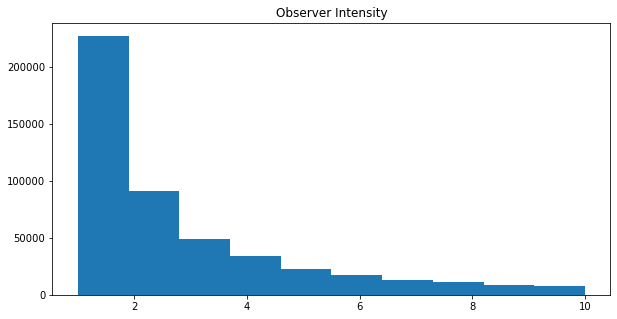

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(data_norm['observation_intensity'][data_norm['observation_intensity'] <= 10], bins=10)
plt.title('Observer Intensity')

Text(0.5, 1.0, 'Observer Intensity: Probability Density Function')

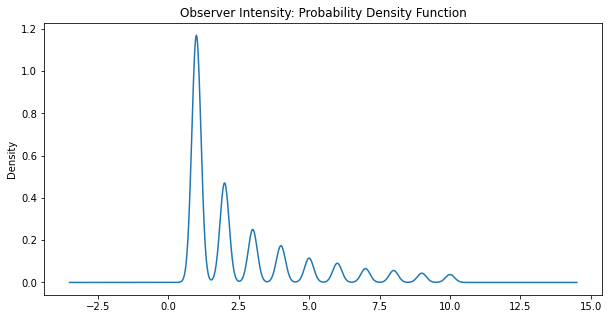

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
data_norm['observation_intensity'][data_norm['observation_intensity'] <= 10].plot(kind='kde')
plt.title('Observer Intensity: Probability Density Function')

### Histograms for some of the parameters

### Correlations

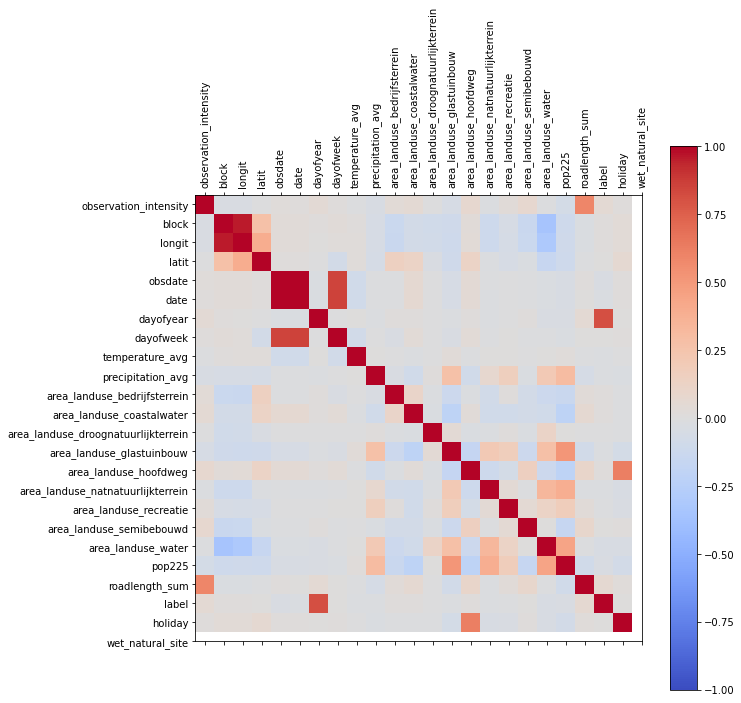

In [15]:
corr = data_norm.corr()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data_norm.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data_norm.columns)
ax.set_yticklabels(data_norm.columns)
plt.show()

Text(0.5, 1.0, 'Seaborn')

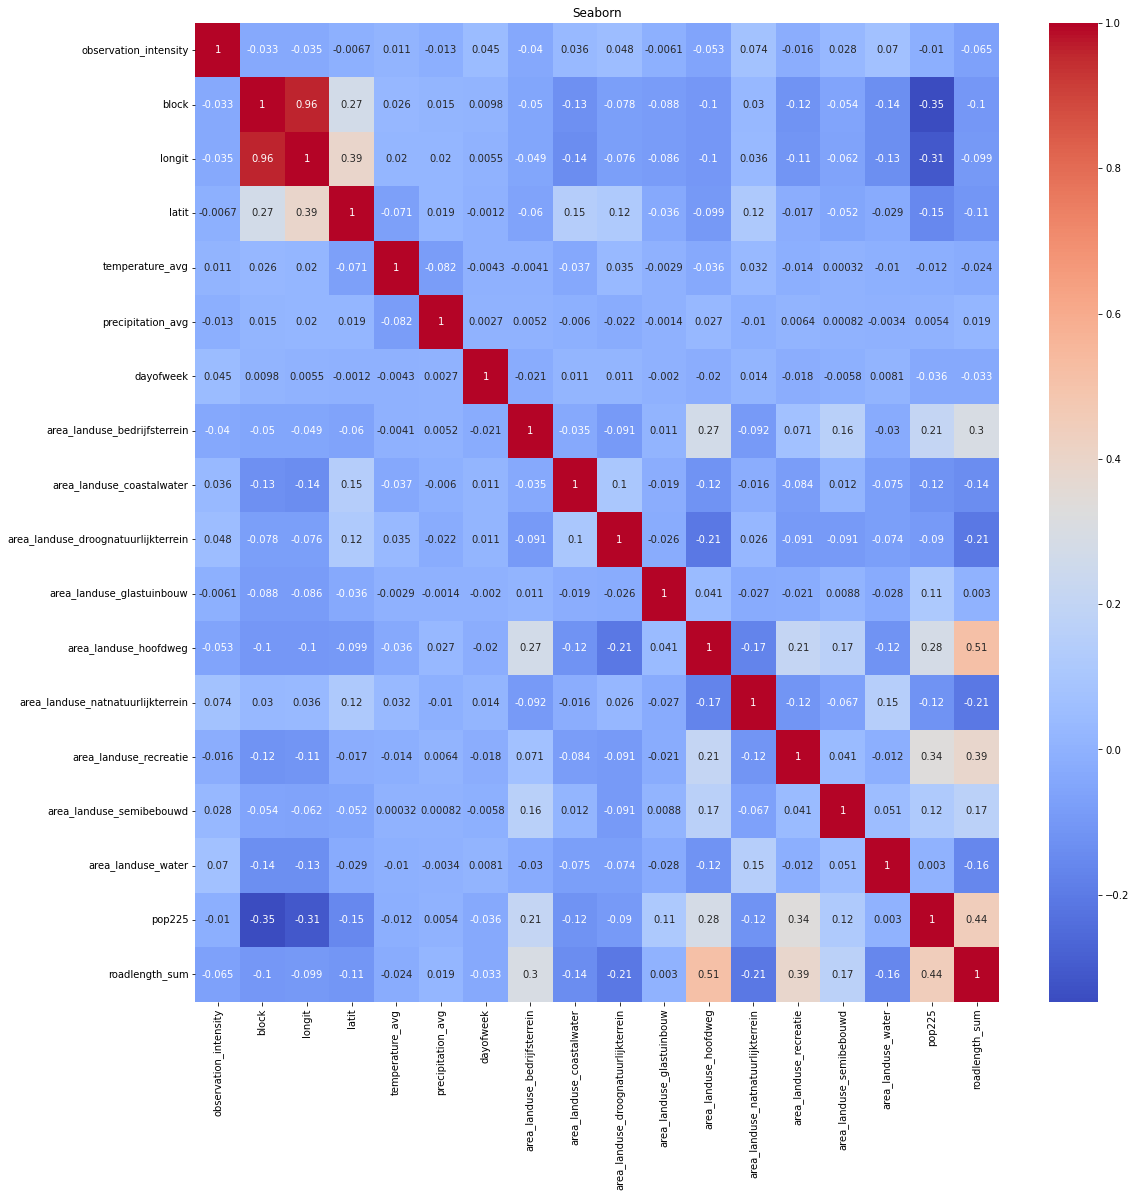

In [16]:

df_seaborn_heatmap=data_norm[['observation_intensity', 'block', 'longit', 'latit', 'obsdate',
       'temperature_avg', 'precipitation_avg', 'dayofweek',
       'area_landuse_bedrijfsterrein', 'area_landuse_coastalwater',
       'area_landuse_droognatuurlijkterrein', 'area_landuse_glastuinbouw',
       'area_landuse_hoofdweg', 'area_landuse_natnatuurlijkterrein',
       'area_landuse_recreatie', 'area_landuse_semibebouwd',
       'area_landuse_water', 'pop225', 'roadlength_sum']]
plt.figure(figsize=(18,18))
seaborn.heatmap(df_seaborn_heatmap.corr(), annot=True, cmap="coolwarm").set_title('Seaborn')

In [17]:
corr

,observation_intensity,block,longit,latit,date,dayofyear,dayofweek,temperature_avg,precipitation_avg,area_landuse_bedrijfsterrein,...,area_landuse_hoofdweg,area_landuse_natnatuurlijkterrein,area_landuse_recreatie,area_landuse_semibebouwd,area_landuse_water,pop225,roadlength_sum,label,holiday,wet_natural_site
observation_intensity,1.000000,-0.033164,-0.034903,-0.006699,0.015836,0.014007,0.045109,0.010572,-0.013403,-0.039833,...,-0.053132,0.074355,-0.015877,0.027672,0.070475,-0.010353,-0.064760,0.589838,0.053805,0.011333
block,-0.033164,1.000000,0.959701,0.271237,0.027366,0.028616,0.009762,0.026135,0.014859,-0.049917,...,-0.100928,0.029962,-0.115864,-0.054191,-0.135219,-0.346993,-0.101662,-0.026906,0.014239,0.032946
longit,-0.034903,0.959701,1.000000,0.393698,0.025868,0.026890,0.005512,0.019534,0.020217,-0.049457,...,-0.101697,0.035721,-0.111121,-0.061559,-0.132738,-0.307728,-0.098732,-0.027930,0.009997,0.033274
latit,-0.006699,0.271237,0.393698,1.000000,0.013934,0.013046,-0.001170,-0.070962,0.019096,-0.060003,...,-0.098616,0.119922,-0.017027,-0.051715,-0.028592,-0.152728,-0.108753,-0.013251,0.000798,0.056214
date,0.015836,0.027366,0.025868,0.013934,1.000000,0.992199,-0.026280,0.847429,-0.086085,-0.011292,...,-0.049597,0.044881,-0.015036,-0.001323,-0.009816,-0.028824,-0.039327,0.008417,-0.031354,0.012518
dayofyear,0.014007,0.028616,0.026890,0.013046,0.992199,1.000000,-0.024222,0.853945,-0.087867,-0.011309,...,-0.050120,0.045144,-0.015821,-0.001708,-0.010165,-0.029242,-0.040087,0.006131,-0.030855,0.012693
dayofweek,0.045109,0.009762,0.005512,-0.001170,-0.026280,-0.024222,1.000000,-0.004256,0.002672,-0.021306,...,-0.020307,0.014305,-0.018385,-0.005800,0.008077,-0.036240,-0.033475,0.048095,0.810982,0.007107
temperature_avg,0.010572,0.026135,0.019534,-0.070962,0.847429,0.853945,-0.004256,1.000000,-0.082423,-0.004119,...,-0.036150,0.032014,-0.014301,0.000320,-0.009959,-0.012292,-0.024370,0.007778,0.000431,0.008443
precipitation_avg,-0.013403,0.014859,0.020217,0.019096,-0.086085,-0.087867,0.002672,-0.082423,1.000000,0.005241,...,0.027264,-0.010085,0.006352,0.000815,-0.003438,0.005366,0.018799,-0.014356,-0.017456,-0.001765
area_landuse_bedrijfsterrein,-0.039833,-0.049917,-0.049457,-0.060003,-0.011292,-0.011309,-0.021306,-0.004119,0.005241,1.000000,...,0.272758,-0.091669,0.071491,0.159042,-0.030052,0.208138,0.299485,-0.055322,-0.021984,-0.029986


### Boxplots

<AxesSubplot:>

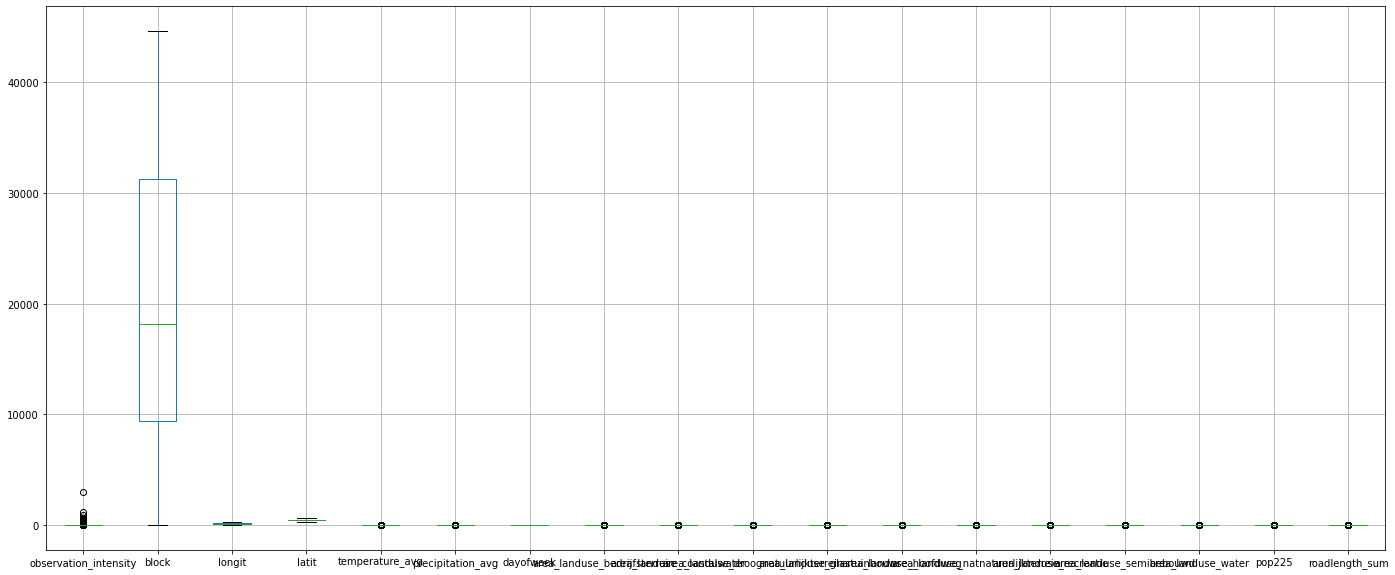

In [18]:
fig, ax = plt.subplots(figsize=(24,10))
data_norm.boxplot(column=['observation_intensity', 'block', 'longit', 'latit',
       'temperature_avg', 'precipitation_avg', 'dayofweek',
       'area_landuse_bedrijfsterrein', 'area_landuse_coastalwater',
       'area_landuse_droognatuurlijkterrein', 'area_landuse_glastuinbouw',
       'area_landuse_hoofdweg', 'area_landuse_natnatuurlijkterrein',
       'area_landuse_recreatie', 'area_landuse_semibebouwd',
       'area_landuse_water', 'pop225', 'roadlength_sum'])

In [19]:
data_norm.columns

data_norm_new=data_norm[['observation_intensity', 'block', 'longit', 'latit',
       'temperature_avg', 'precipitation_avg', 'dayofweek',
       'area_landuse_bedrijfsterrein', 'area_landuse_coastalwater',
       'area_landuse_droognatuurlijkterrein', 'area_landuse_glastuinbouw',
       'area_landuse_hoofdweg', 'area_landuse_natnatuurlijkterrein',
       'area_landuse_recreatie', 'area_landuse_semibebouwd',
       'area_landuse_water', 'pop225', 'roadlength_sum']]

### Correlation and p-value

In [20]:
df=data_norm_new.dropna()
pnr_value = pd.DataFrame (columns=['r','p'])

for col in data_norm_new:
    if pd.api.types.is_numeric_dtype(df[col]):
        r , p =stats.pearsonr (df.observation_intensity, df[col])
        pnr_value.loc[col]=[round(r,3), round(p,9)]
pnr_value

,r,p
observation_intensity,1.000,0.000000e+00
block,-0.033,0.000000e+00
longit,-0.035,0.000000e+00
latit,-0.007,9.580000e-07
temperature_avg,0.011,0.000000e+00
precipitation_avg,-0.013,0.000000e+00
dayofweek,0.045,0.000000e+00
area_landuse_bedrijfsterrein,-0.040,0.000000e+00
area_landuse_coastalwater,0.036,0.000000e+00
area_landuse_droognatuurlijkterrein,0.048,0.000000e+00


<AxesSubplot:>

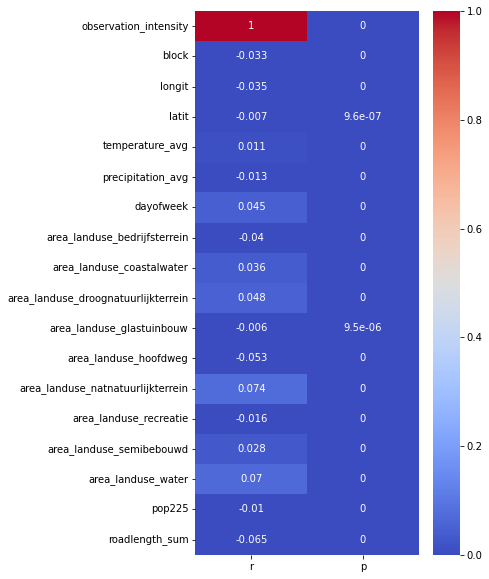

In [21]:
df_seaborn_heatmap=pnr_value
plt.figure(figsize=(5,10))
seaborn.heatmap(df_seaborn_heatmap,vmin=-0.000000, vmax=1, annot=True, cmap="coolwarm")

In [22]:
data_norm

,observation_intensity,block,longit,latit,obsdate,date,dayofyear,dayofweek,temperature_avg,precipitation_avg,...,area_landuse_hoofdweg,area_landuse_natnatuurlijkterrein,area_landuse_recreatie,area_landuse_semibebouwd,area_landuse_water,pop225,roadlength_sum,label,holiday,wet_natural_site
0,4,171,18,379,1/1/2017,-0.492017,-0.489858,7,-0.308853,0.083571,...,-0.035319,-0.034260,-0.052468,-0.004971,-0.048758,-0.152873,-0.097407,-1,1,0
1,4,209,19,379,1/1/2017,-0.492017,-0.489858,7,-0.308813,0.083177,...,-0.059792,0.140181,0.004940,-0.019607,-0.087495,-0.152512,-0.125595,-1,1,0
2,1,234,20,365,1/1/2017,-0.492017,-0.489858,7,-0.314578,0.066002,...,0.002192,-0.034260,-0.053630,-0.025294,-0.068744,-0.150175,-0.062618,-1,1,0
3,1,248,20,379,1/1/2017,-0.492017,-0.489858,7,-0.308778,0.082690,...,-0.003262,-0.034260,0.489656,-0.022096,-0.087495,-0.146376,0.012297,-1,1,0
4,6,280,21,371,1/1/2017,-0.492017,-0.489858,7,-0.311974,0.079491,...,0.133451,-0.034260,-0.053630,-0.025277,-0.087495,-0.145611,-0.019277,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535037,2,44543,200,360,30/06/2017,0.507983,0.510142,5,0.238297,0.177026,...,0.017795,-0.034260,-0.016705,-0.000794,-0.075959,-0.067013,0.315154,-1,0,0
535038,2,44560,201,360,30/06/2017,0.507983,0.510142,5,0.238078,0.171568,...,-0.022137,-0.034260,-0.049759,0.013424,-0.072121,-0.069999,0.146029,-1,0,0
535039,12,44592,205,351,30/06/2017,0.507983,0.510142,5,0.240303,0.168476,...,-0.079202,-0.034260,-0.053630,-0.025294,-0.087495,-0.118972,-0.095152,1,0,0
535040,3,44596,206,351,30/06/2017,0.507983,0.510142,5,0.240159,0.164866,...,-0.079202,-0.034260,-0.053630,-0.025294,-0.087495,-0.140580,-0.129951,-1,0,0


## ML with Random Forest Model with Dask

In [23]:
client = Client(processes=False, threads_per_worker=4,
                n_workers=1, memory_limit='2GB')
# please do not forget to shutdown the  client 

### In the below cell we transform the dataframe to another dataframe with interested or model features with higher correlation only 

In [24]:
data_norm = data_norm.dropna()
# Since we are interested to estimate the observer intensity temporally - on holidays and spatially that is for wet natural terrain
# below we only consider from the dataframe having wet natural site = 1 
data_wet_natural_site = data_norm[data_norm['wet_natural_site'] > 0]

n = round(0.7 * len(data_wet_natural_site)) # length of the training set = split index
# label is oberver intensity changed to -1 for low(oberver intensity range 0 - 4) 0 for medium(oberver intensity range 4 - 10) 1 for high(oberver intensity range 10+)   
ytrain = data_wet_natural_site['label'][:n]
# Features we are interested in and also that have high correlation with oberver intensity or label
xtrain = data_wet_natural_site[['pop225','block','longit','latit','holiday', 'precipitation_avg', 'temperature_avg']][:n]
#xtrain =data_wet_natural_site.iloc[:, ['holiday', 'precipitation_avg', 'temperature_avg']][:n]
ytest = data_wet_natural_site['label'][n:]
xtest = data_wet_natural_site[['pop225','block','longit','latit','holiday', 'precipitation_avg', 'temperature_avg']][n:]

print('length training set: ', ytrain.shape)
print('length testing set: ', ytest.shape)

length training set:  (2963,)
length testing set:  (1270,)


## Converting to Dask dataframe from pandas so as to utillize dask clusters and parllelism 

In [25]:
ydd_train = dd.from_pandas(ytrain, npartitions=10)
Xdd_train = dd.from_pandas(xtrain, npartitions=10)
ydd_test = dd.from_pandas(ytest, npartitions=10)
Xdd_test = dd.from_pandas(xtest, npartitions=10)

In [26]:
#Standardisation of values 

scaler = pr.StandardScaler()
scaler.fit(Xdd_train)
X_train = scaler.transform(Xdd_train)
X_test = scaler.transform(Xdd_test)

In [27]:
rf = RandomForestClassifier()
# fit with dask
with parallel_backend('dask'):
    rf.fit(X_train, ydd_train)

In [28]:
ypred_rf = rf.predict(X_test)

In [29]:
print(rf.feature_importances_)

[0.07781602 0.07697082 0.06285572 0.06613474 0.04403557 0.18328182
 0.48890532]


In [30]:
from sklearn.metrics import accuracy_score

pa_mp = accuracy_score(ytest, ypred_rf, normalize=False)

In [31]:
print("Classification accuracy of RF is", pa_mp/len(ytest))

Classification accuracy of RF is 0.5307086614173229


## Hyper Parameter optimization using Random Search and Grid Search 

In [33]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from time import time

clf = RandomForestClassifier()

param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)


train_features = X_train.to_dask_array(lengths=True)

train_labels = ydd_train.to_dask_array(lengths=True)

test_features = X_test.to_dask_array(lengths=True)

test_labels = ydd_test.to_dask_array(lengths=True)



start = time()
random_search.fit(train_features, train_labels)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))

random_search.best_params_

RandomizedSearchCV took 115.51 seconds for 20 candidates parameter settings.


{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 2,
 'min_samples_split': 6}

In [34]:
best_random = random_search.best_estimator_
best_random.fit(train_features, train_labels)
pred_labels = best_random.predict(test_features)
pa_mp = accuracy_score(test_labels, pred_labels, normalize=False)
print("Classification accuracy of RF (Random Search) is", pa_mp/len(test_labels))

Classification accuracy of RF (Random Search) is 0.5748031496062992


In [35]:
# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
start = time()
grid_search.fit(train_features, train_labels)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))

grid_search.best_params_

GridSearchCV took 341.11 seconds for 72 candidate parameter settings.


{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 1,
 'min_samples_split': 2}

In [36]:
best_grid = grid_search.best_estimator_
best_grid.fit(train_features, train_labels)
pred_labels = best_grid.predict(test_features)
pa_mp = accuracy_score(test_labels, pred_labels, normalize=False)
print("Classification accuracy of RF (Grid Search) is", pa_mp/len(test_labels))

Classification accuracy of RF (Grid Search) is 0.5748031496062992


## We can notice a greater accuracy score using grid search, but it may not be enough; we may need to add some more attributes to our dataframe.

## Due to time constraints, we were unable to fine-tune by taking into account additional factors, as our primary focus was on wet natural landscape and holidays as a temporal dimension.


## Future Enhancement : We can also consider accessibility to improve accuracy scores and model training.

In [ ]:
client.shutdown()